<a href="https://colab.research.google.com/github/ulissigroup/math-methods-chemical-engineering/blob/master/lecture_notes/18-nonlinear-coupled-ODEs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
$$\newcommand{\arr}[1]{\underline{\underline{#1}}}$$    
$$\newcommand{\vec}[1]{\underline{#1}}$$   
$$\require{mhchem}$$

# Nonlinear coupled ODE's 



* Just like for second order ODE's, nonlinear coupled ODE's are extremely difficult to solve analytically. There's a small number of special problems that can be solved. 
* It is sometimes possible to solve them under certain assumptions about parameters, or using specialized techniques like asymptotic analysis. If you find this interesting, check out the work of Prof. Khair in our department, who solves really hard nonlinear ODE's or PDE's using special techniques. 

* Nonlinear coupled ODE's are very common in chemical engineering. The most common case is reaction kinetics, since any reaction that is more complicated than first-order kinetics is nonlinear. If you have two or more species to solve for, or multiple reactions (like you will see in the numerical project to be discussed at the end of class), you have nonlinear coupled ODE's. 

* You have to be a little more careful with your numerical settings in `solve_ivp`. Up until now the default settings usually worked, but nonlinear terms sometimes makes the numerical integration a little more complicated.

* Section 4 in the course textbook

# Linear coupled ODE's solutions

What sort of solutions do we expect to a system of linear coupled ODE's?

# Lotka-Volterra dynamics (predator-prey)

We are park wardens in Yellowstone National Park and are responsible for managing the population of wolves and rabbits. 

![alt text](https://www.jhecotouradventures.com/images/blog-images/IMG_0755-2.jpg)
![alt text](https://thumbs-prod.si-cdn.com/iE40RIPnDJTToLynalitJETf6iE=/800x600/filters:no_upscale()/https://public-media.si-cdn.com/filer/a5/19/a5195e62-c892-4fe7-bae5-42e355120386/wtjr_-_frontsl_close-up.jpg)


* We need to know the maximum number of wolves over the course of the year, and want to keep that number below 20.

We are interested in how the two populations of species (Rabbits and wolves) might change over time. 

* Rabbits are $x(t)$, wolves are $y(t)$
* The rate of rabbits being eaten by wolves is proportional to both ($\beta xy$)
* Rabbits reproduce on their own at a rate proportional to the number of rabbits, and rabbits are eaten by wolves at a rate proportional to the number of rabbits and wolves $$\frac{dx}{dt}=\alpha x-\beta xy$$ where $\alpha$ and $\beta$ are constants.
* Wolves are able to reproduce at a rate proportional to the number of wolves and rabbits (how quickly rabbits are being eaten) and die at a rate proportional to the number of wolves (sickness/injury/etc) $$\frac{dy}{dt}=\delta xy-\gamma y$$

Let's say we start with 1 rabbit and 5 wolves, and the constants are 
* $\alpha=1 $[1/day]
* $\beta=0.2$ [1/wolves/day]
* $\delta=0.5$ [1/rabbits/day]
* $\gamma=0.2$ [1/day]

Solve for and plot the population of rabbits and wolves over the first 20 days.

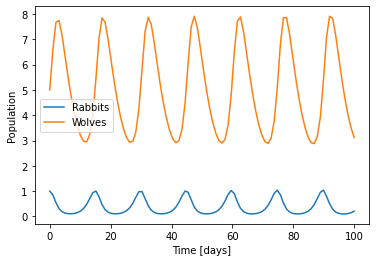

In [0]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

alpha = 1 # 1/day
beta = 0.2 #1/wolves/day
delta = 0.5 #1/rabbits/day
gamma = 0.2 #1/day

def diff_eq(t,population): 
  # t is independent variable
  # y is a vector of things we want solve_ivp to integrate for
  #  y = [y1, y2]
  #  y = [x,y]
  # return vector the same shape as population/y
    # this will be the differential equation for each thing in population/y

  x,y = population

  return [alpha*x - beta*x*y,
          delta*x*y - gamma*y]


t_span = [0, 100]
initial_population = [1, 5]
t_eval = np.linspace(0,100, 100)

sol = solve_ivp(diff_eq, 
                t_span, 
                initial_population, 
                t_eval=t_eval)

plt.plot(sol.t, sol.y.T)
plt.xlabel('Time [days]')
plt.ylabel('Population')
plt.legend(['Rabbits','Wolves'])
# plt.ylim([0,40])



## Phase portraits

One way to analyze this behavior (especially when no coefficient depend on time) is the phase portrait. The x/y value completely defines the current state of the system, and the absolute value of time is not important.

A phase portrait simply plotting these two quantities against each other!

Text(0, 0.5, 'Population of Wolves')

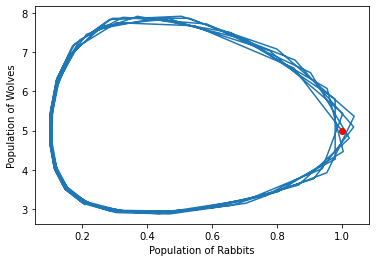

In [0]:
plt.plot(sol.y[0,:], sol.y[1,:])
plt.plot(sol.y[0,0:1], sol.y[1,0:1],'or')

plt.xlabel('Population of Rabbits')
plt.ylabel('Population of Wolves')

We can also use the differential equation to show how the system will evolve by plotting a field of x' and y'

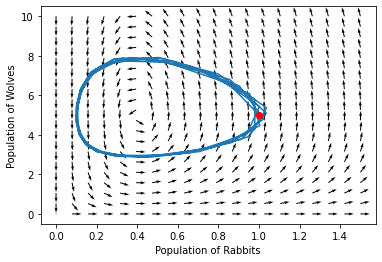

In [0]:
# Add plot here
plt.plot(sol.y[0,:], sol.y[1,:])
plt.plot(sol.y[0,0:1], sol.y[1,0:1],'or')

plt.xlabel('Population of Rabbits')
plt.ylabel('Population of Wolves')

#Generate grids of populations at which to evaluate the local gradient 
# (adapted from an example in John Kitchin's 06-623 course)

r = np.linspace(0, 1.5, 20) # rabbit grid
f = np.linspace(0, 10, 20) # wolves grid

R, F = np.meshgrid(r, f) # 2D arrays of (rabbit, wolves) points

DR, DF = diff_eq(0, [R, F])

# This normalizes the arrows so they are all the same length and just show the direction
N = np.sqrt(DR**2 + DF**2)
N[N==0] = 1 # eliminate / 0 errors, it is sort of optional.
DR /= N
DF /= N

plt.quiver(R, F, DR, DF)



Notice that there is a special point on this phase portrait! What is it?

## Effect of initial conditions

Because the equations are nonlinear, it is hard to predict how the solution will behave.

First, try starting with 0.8 rabbits instead of 1 rabbit and see what happens.



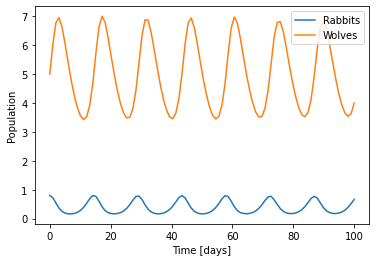

In [0]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

alpha = 1 # 1/day
beta = 0.2 #1/wolves/day
delta = 0.5 #1/rabbits/day
gamma = 0.2 #1/day

def diff_eq(t,population): 
  # t is independent variable
  # y is a vector of things we want solve_ivp to integrate for
  #  y = [y1, y2]
  #  y = [x,y]
  # return vector the same shape as population/y
    # this will be the differential equation for each thing in population/y

  x,y = population

  return [alpha*x - beta*x*y,
          delta*x*y - gamma*y]


t_span = [0, 100]
initial_population = [0.8, 5]
t_eval = np.linspace(0,100, 100)

sol = solve_ivp(diff_eq, 
                t_span, 
                initial_population, 
                t_eval=t_eval)

plt.plot(sol.t, sol.y.T)
plt.xlabel('Time [days]')
plt.ylabel('Population')
plt.legend(['Rabbits','Wolves'])
# plt.ylim([0,40])



Now, try changing the initial population to 10 rabbits and 1 wolf and see what happens.

Hint: try integrating longer than 20 days

What is the maximum number of wolves that you ever get in your population? 

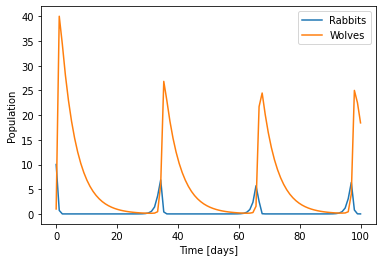

In [0]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

alpha = 1 # 1/day
beta = 0.2 #1/wolves/day
delta = 0.5 #1/rabbits/day
gamma = 0.2 #1/day

def diff_eq(t,population): 
  # t is independent variable
  # y is a vector of things we want solve_ivp to integrate for
  #  y = [y1, y2]
  #  y = [x,y]
  # return vector the same shape as population/y
    # this will be the differential equation for each thing in population/y

  x,y = population

  return [alpha*x - beta*x*y,
          delta*x*y - gamma*y]


t_span = [0, 100]
initial_population = [10, 1]
t_eval = np.linspace(0,100, 100)

sol = solve_ivp(diff_eq, 
                t_span, 
                initial_population, 
                t_eval=t_eval)

plt.plot(sol.t, sol.y.T)
plt.xlabel('Time [days]')
plt.ylabel('Population')
plt.legend(['Rabbits','Wolves'])
# plt.ylim([0,40])



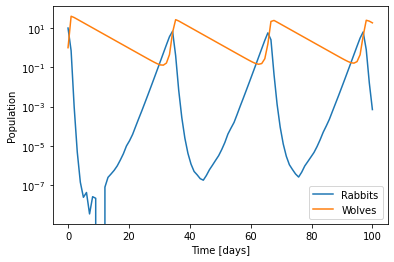

In [0]:
plt.semilogy(sol.t, sol.y.T)
plt.xlabel('Time [days]')
plt.ylabel('Population')
plt.legend(['Rabbits','Wolves'])

This is actually a case where you have to be really careful with the numerical methods. It's more easy to see if we use a log scale for the y axis!

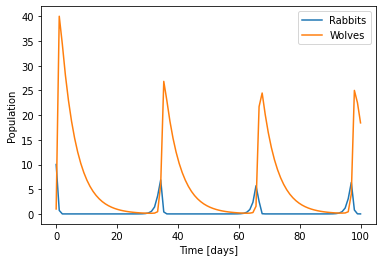

In [0]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

alpha = 1 # 1/day
beta = 0.2 #1/wolves/day
delta = 0.5 #1/rabbits/day
gamma = 0.2 #1/day

def diff_eq(t,population): 
  # t is independent variable
  # y is a vector of things we want solve_ivp to integrate for
  #  y = [y1, y2]
  #  y = [x,y]
  # return vector the same shape as population/y
    # this will be the differential equation for each thing in population/y

  x,y = population

  return [alpha*x - beta*x*y,
          delta*x*y - gamma*y]


t_span = [0, 100]
initial_population = [10, 1]
t_eval = np.linspace(0,100, 100)

sol = solve_ivp(diff_eq, 
                t_span, 
                initial_population, 
                t_eval=t_eval)

plt.plot(sol.t, sol.y.T)
plt.xlabel('Time [days]')
plt.ylabel('Population')
plt.legend(['Rabbits','Wolves'])
# plt.ylim([0,40])



## Numerical tolerances in integrating equations

Check the default tolerances in solve_ivp (rtol/atol). Search for solve_ivp on google and read the description of those entries (or it pops up in colab). We can use those to control the accuracy of the integration. Here we need much tighter tolerances to get accurate solutions. Try making rtol/atol smaller and see what happens.

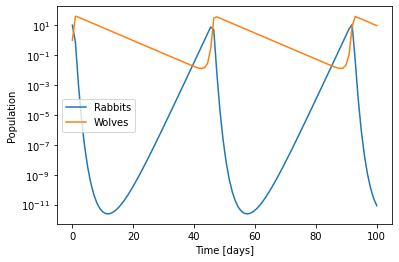

In [0]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

alpha = 1 # 1/day
beta = 0.2 #1/wolves/day
delta = 0.5 #1/rabbits/day
gamma = 0.2 #1/day

def diff_eq(t,population): 
  # t is independent variable
  # y is a vector of things we want solve_ivp to integrate for
  #  y = [y1, y2]
  #  y = [x,y]
  # return vector the same shape as population/y
    # this will be the differential equation for each thing in population/y

  x,y = population

  return [alpha*x - beta*x*y,
          delta*x*y - gamma*y]


t_span = [0, 100]
initial_population = [10, 1]
t_eval = np.linspace(0,100, 100)

sol = solve_ivp(diff_eq, 
                t_span, 
                initial_population, 
                t_eval=t_eval,
                rtol=1e-12,
                atol=1e-12)

plt.semilogy(sol.t, sol.y.T)
plt.xlabel('Time [days]')
plt.ylabel('Population')
plt.legend(['Rabbits','Wolves'])



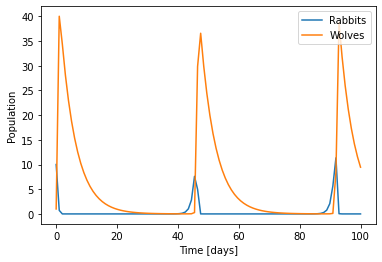

In [0]:

plt.plot(sol.t, sol.y.T)
plt.xlabel('Time [days]')
plt.ylabel('Population')
plt.legend(['Rabbits','Wolves'])



# Other complexities in nonlinear coupled ODE's


* Using tools like `solve_ivp` to numerically integrate these systems is relatively straightforward. There are two things you have to watch out for:
  * Some coupled nonlinear ODE's with special form are **chaotic** like the Lorenz Strange Attractor https://en.wikipedia.org/wiki/Lorenz_system 
    * This implies that they have unpredictable behavior for some parameters and initial conditions.  No analytical solution exists.
    * Chaotic behavior also implies that small changes to initial conditions in these unpredictable regimes leads to drastically different results, such that numerical solutions are basically impossible.
    * You should really read The Three Body Problem by Cixin Liu. It's incredible. https://www.amazon.com/Three-Body-Problem-Cixin-Liu/dp/0765382032


## Chaotic nonlinear systems (the Lorenz system)

Let's examine the Lorenz System 
\begin{align*}
x'&=\sigma(y-x)\\
y'&=x(\rho-z)-y\\
z'&=xy-\beta z
\end{align*}
where $\sigma, \rho, \beta$ are three adjustable parameters. Looks simple! Three differential equations, three reactions, no really strange operations. 



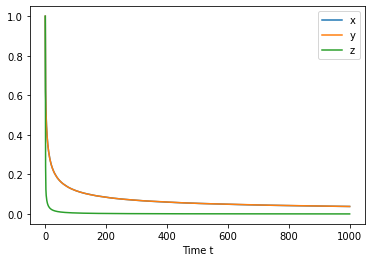

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D

rho = 1.0
sigma = 10.0
beta = 8.0 / 3.0

def diff_eq(t, state):
    x, y, z = state  # Unpack the state vector
    return [sigma * (y - x), 
            x * (rho - z) - y, 
            x * y - beta * z]  # Derivatives

initial_condition = [1.0, 1.0, 1.0]

#Integrate from t=0 to t=1000
t=[0,1000]
t_eval = np.linspace(t[0],t[1],1000)

states = solve_ivp(diff_eq, t, initial_condition, t_eval=t_eval)

plt.plot(states.t, states.y.T)
plt.xlabel('Time t')
plt.legend(['x','y','z'])

Let's plot the same thing in 3d. 

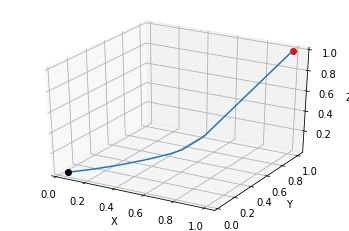

In [0]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(states.y[0,0:1], states.y[1,0:1], states.y[2,0:1],'or')
ax.plot(states.y[0,:], states.y[1,], states.y[2,:])
ax.plot(states.y[0,-1:], states.y[1,-1:], states.y[2,-1:],'ok')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.draw()
plt.show()

## In-class example: Try repeating this two plots for $\rho=28$. Try plotting for t=[0,1], then t=[0,5], then t=[0,100]. 

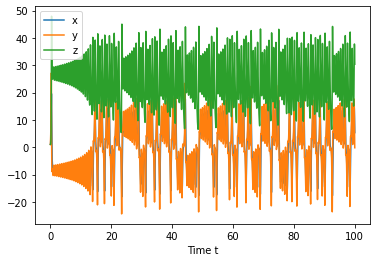

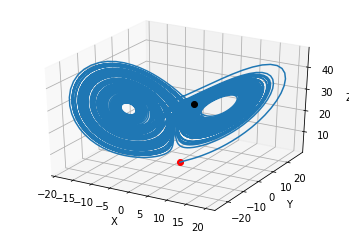

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D

rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0

def diff_eq(t, state):
    x, y, z = state  # Unpack the state vector
    return [sigma * (y - x), 
            x * (rho - z) - y, 
            x * y - beta * z]  # Derivatives

initial_condition = [1.1, 1.0, 1.0]

#Integrate from t=0 to t=1000
t=[0,100]
t_eval = np.linspace(t[0],t[1],10000)

states = solve_ivp(diff_eq, t, initial_condition, t_eval=t_eval)

plt.plot(states.t, states.y.T)
plt.xlabel('Time t')
plt.legend(['x','y','z'])

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(states.y[0,0:1], states.y[1,0:1], states.y[2,0:1],'or')
ax.plot(states.y[0,:], states.y[1,], states.y[2,:])
ax.plot(states.y[0,-1:], states.y[1,-1:], states.y[2,-1:],'ok')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.draw()
plt.show()

# What can we say about nonlinear systems?

* We can solve them numerically
* We can solve for the steady states (sometimes)
* We can find the steady states numerically
* We can analyze the stability of steady states
* For certain parameters / initial conditions, we might be able to approximate them as a set of linear equations.

